<a href="https://colab.research.google.com/github/Subus2004/CNN-NUMCLASSIFIER/blob/main/MNISTCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
  (x_train, y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [ ]:
#normalize the data into 1's and 0's to get better output
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


# Here we have used 3 convolution layers, but if we wanna increase the accuracy we can also use more convolution layers

In [ ]:
MNISTmodel = Sequential()
MNISTmodel.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
MNISTmodel.add(MaxPooling2D((2, 2)))
MNISTmodel.add(Conv2D(64, (3, 3), activation='relu'))
MNISTmodel.add(MaxPooling2D((2, 2)))
MNISTmodel.add(Conv2D(128, (3, 3), activation='relu'))  # Third convolutional layer
MNISTmodel.add(MaxPooling2D((2, 2)))
MNISTmodel.add(Flatten())
MNISTmodel.add(Dense(10, activation='softmax'))

In [ ]:
MNISTmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
history = MNISTmodel.fit(x_train, y_train, epochs=12, validation_data=(x_test, y_test))

Epoch 1/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9957 - loss: 0.0138 - val_accuracy: 0.9861 - val_loss: 0.0709
Epoch 2/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9985 - loss: 0.0042 - val_accuracy: 0.9868 - val_loss: 0.0710
Epoch 3/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9977 - loss: 0.0073 - val_accuracy: 0.9841 - val_loss: 0.0897
Epoch 4/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9982 - loss: 0.0053 - val_accuracy: 0.9826 - val_loss: 0.0998
Epoch 5/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9975 - loss: 0.0084 - val_accuracy: 0.9891 - val_loss: 0.0667
Epoch 6/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9990 - loss: 0.0030 - val_accuracy: 0.9889 - val_loss: 0.0643
Epoch 7/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9984 - loss: 0.0052 - val_accuracy: 0.9858 - val_loss: 0.0907
Epoch 8/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9988 - loss: 0.0039 -

In [ ]:
print("Test Loss:", history.history['loss'][-1])
print("Test Accuracy:", history.history['accuracy'][-1])

Test Loss: 0.00566082214936614
Test Accuracy: 0.9982666373252869


## Here we are plotting a graph between training and validation data
**FOR LOSS**

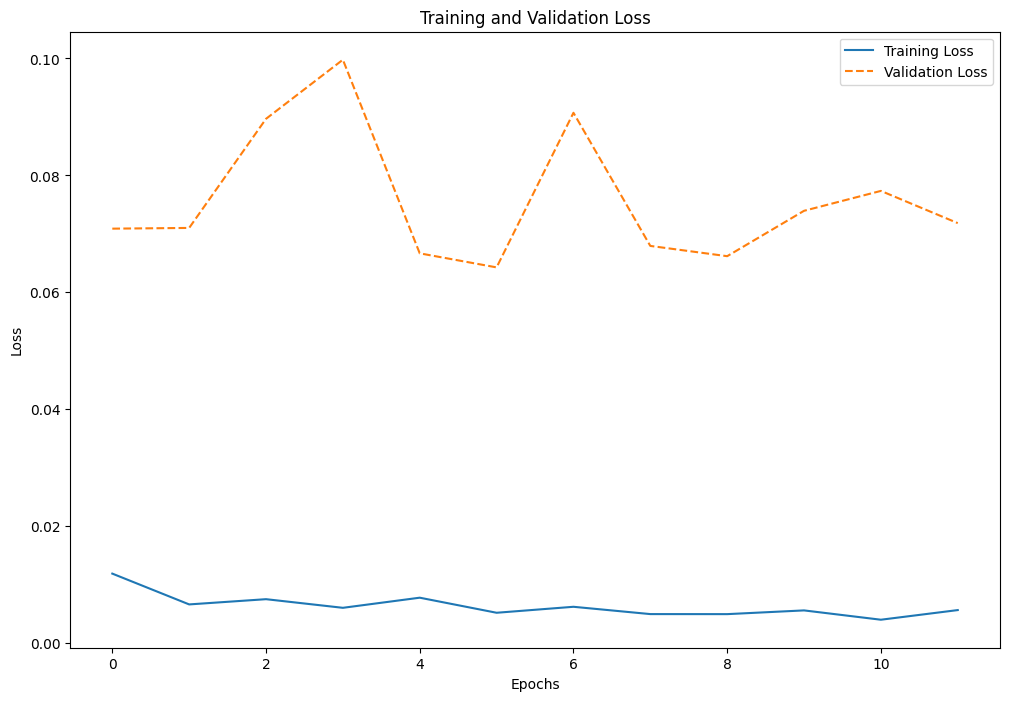

In [ ]:
plt.figure(figsize=(12, 8))


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

**FOR ACCURACY**


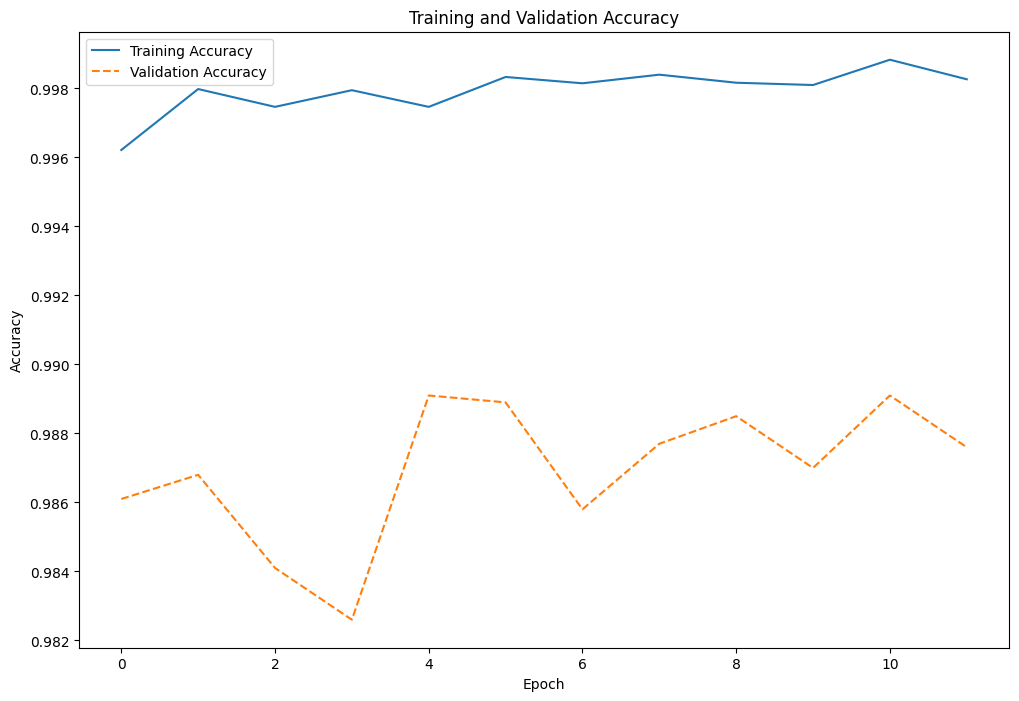

In [ ]:
#we also see that validation and training set doesnt have much difference so there is no overfitting data
plt.figure(figsize=(12, 8))


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

**If u want to put your own image use this code for prediction(NOTE:- But it is highly inefficient as the photos doesn't have same feature after reshaping it manually)**

In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('/content/image5.webp', cv2.IMREAD_GRAYSCALE)



# Resize the image to 28x28
image = cv2.resize(image, (28, 28))

# Normalize the pixel values to the range [0, 1]
image = image.astype('float32') / 255.0

# Reshape the image to match the model's input shape
image = image.reshape(1, 28, 28, 1)
plt.imshow(image.reshape(28,28))

In [ ]:
# Make the prediction
prediction = MNISTmodel.predict(image)

# Get the predicted digit (class with the highest probability)
predicted_digit = np.argmax(prediction)

print("Predicted digit:", predicted_digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted digit: 5


**This code is for predicting the numbers in MNIST datasets**

In [ ]:
y_prob = MNISTmodel.predict(x_test)
y_pred = y_prob.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.9876

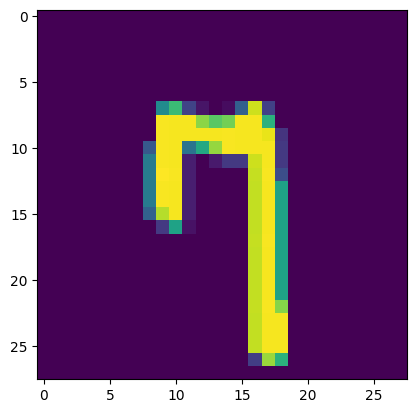

In [ ]:
plt.imshow(x_test[80])


In [ ]:
pred = MNISTmodel.predict(x_test[80].reshape(1,28,28,1)).argmax(axis=1)
print("Predicted digit:", pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Predicted digit: [7]
